# Đề thi cuối kỳ Đại số tuyến tính tính toán trong Khoa học dữ liệu
## Trường ĐH Công nghiệp TPHCM - Khoa CNTT

> Ngày $29/5/2022$, tiết $4-6$. Thời gian làm bài: $90$ phút. SV được dùng tài liệu và Internet.

### Bài 1. (2đ)
Cho hai ma trận vuông $3 \times 3$ sau đây:
$$A=\left( \begin{matrix}
   2 & 2 & 1  \\
   2 & 5 & 3  \\
   2 & 3 & 5  \\
\end{matrix} \right) \text{ và } B=\left( \begin{matrix}
   3 & 1 & 2  \\
   -1 & 2 & 4  \\
   2 & 6 & 3  \\
\end{matrix} \right).$$
- **a)** Hỏi trong các đẳng thức sau có bao nhiêu đẳng thức đúng, hãy kiểm chứng bằng code: $$(A+B)^T = A^T+B^T, \, AB=BA, \,(AB)^{-1} = B^{-1}A^{-1}.$$
- **b)** Tìm ma trận $C$ thỏa mãn $AC - C = B$. *Gợi ý:* $C = CI = IC$ với $I$ là ma trận đơn vị.
- **c)** Tìm vector $\textbf{x}$ thỏa mãn $A\textbf{x} = B \textbf{b}$ với $\textbf{x}^T = (x_1,x_2,x_3)$ và $\textbf{b}^T = (1,-2,-3)?$ Hỏi có tồn tại vector $\textbf{x}$ để cho $A\textbf{x} = \textbf{b}B$ hay không? Vì sao?

In [ ]:
import numpy as np
from numpy import linalg as li
A = np.array([[2, 2, 1], [2, 5, 3], [2, 3, 5]])
B = np.array([[3, 1, 2], [-1, 2, 4], [2, 6, 3]])

**a)** Hỏi trong các đẳng thức sau có bao nhiêu đẳng thức đúng, hãy kiểm chứng bằng code: $$(A+B)^T = A^T+B^T, \, AB=BA, \,(AB)^{-1} = B^{-1}A^{-1}.$$


* $(A+B)^T = A^T+B^T$

In [ ]:
np.allclose(np.add(A,B).T, np.add(A.T,B.T))

True

* $AB=BA$

In [ ]:
np.allclose(A@B.T, B@A)

False

* $(AB)^{-1} = B^{-1}A^{-1} $

In [ ]:
np.allclose(np.linalg.inv(A@B), np.linalg.inv(B)@np.linalg.inv(A))

True

**b)** Tìm ma trận $C$ thỏa mãn $AC - C = B$. *Gợi ý:* $C = CI = IC$ với $I$ là ma trận đơn vị.


$AC-C=B <=> (A-I)C=B$<br>
$C=(A-I)^{-1}B$

In [ ]:
I = np.eye(3)
C = (A-I)@B
C

array([[ 3., 11., 13.],
       [ 8., 28., 29.],
       [11., 32., 28.]])

**c)** Tìm vector $\textbf{x}$ thỏa mãn $A\textbf{x} = B \textbf{b}$ với $\textbf{x}^T = (x_1,x_2,x_3)$ và $\textbf{b}^T = (1,-2,-3)?$ Hỏi có tồn tại vector $\textbf{x}$ để cho $A\textbf{x} = \textbf{b}B$ hay không? Vì sao?

In [ ]:
b = np.array([[1], [-2], [-3]])
x = li.inv(A)@(B.dot(b))
x.T

array([[ 1., -2., -3.]])

### Bài 2. (2đ)

Trong lĩnh vực xử lý ngôn ngữ tự nhiên $NLP$, với danh sách từ vựng $\mathcal{L}$ độ dài $\ell$, mỗi câu văn có thể được mô tả bởi 1 vector $v\in\mathbb{R}^{\ell}$ mà thành phần thứ $i$ cho biết số lần mà từ $d_i \in \mathcal{L}$ xuất hiện trong câu, còn được gọi là tọa độ của câu văn trong $\mathcal{L}$. Xét các câu văn sau đây:
> * $D_1$: *tôi là An*.
> * $D_2$: *tôi thích đi xem phim*.
> * $D_3$: *An rất thích xem tôi du lịch*.
> * $D_4$: *tôi rất rất thích đi du lịch, An là tên tôi*.

Giả sử rằng $\mathcal{L} =$ (*An, du, đi, là, lịch, phim, rất, tên, thích, tôi, xem*) với $|\mathcal{L}| = 11$ thì chẳng hạn câu văn $D_0$ = *tôi rất thích An An* sẽ có tọa độ là $$d_0 = (2,0,0,0,0,0,1,0,1,1,0).$$
- **a)** Viết toạ độ của các câu văn $D_1,D_2,D_3,D_4$ ở dạng vector trong không gian $11$ chiều ứng với từ vựng $\mathcal{L}$.
- **b)** Tính khoảng cách Euclid đôi một giữa các câu văn trên sử dụng thư viện *numpy.linalg*.
- **c)** Ở trên ta dùng thư viện, vậy hãy cho biết công thức Toán học cụ thể để tính khoảng cách Euclid giữa hai vector bên dưới là gì:
$$d = (x_1,x_2,...,x_{11}) \text{ và } d' = (y_1,y_2,...,y_{11})?$$

In [ ]:
def dem(D):
  D = D.split()
  L = np.array(['An', 'du', 'đi', 'là', 'lịch', 'phim', 'rất', 'tên', 'thích', 'tôi', 'xem'])
  res = {key: 0 for key in L}
  for i in D:
    if i in L:
      res[i]+=1
  return np.array(list(res.values()))


In [ ]:
D0 = 'tôi rất thích An An'
dem(D0)

array([2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
#hãy giải câu a), b) bằng cách hoàn thành đoạn code sau đây (điền vào dấu ...)
import numpy as np
D1 = 'tôi là An'
D2 = 'tôi thích đi xem phim'
D3 = 'An rất thích xem tôi du lịch'
D4 = 'tôi rất rất thích đi du lịch, An là tên tôi'
d1 = dem(D1)
d2 = dem(D2)
d3 = dem(D3)
d4 = dem(D4)
D = np.vstack([d1,d2,d3,d4])
l = len(D)
for i in range(l):
    for j in range(l):
        print('Khoảng cách giữa d{} & d{} là'.format(i+1,j+1), round(np.linalg.norm(D[i] - D[j], 2)))

Khoảng cách giữa d1 & d1 là 0
Khoảng cách giữa d1 & d2 là 2
Khoảng cách giữa d1 & d3 là 2
Khoảng cách giữa d1 & d4 là 3
Khoảng cách giữa d2 & d1 là 2
Khoảng cách giữa d2 & d2 là 0
Khoảng cách giữa d2 & d3 là 2
Khoảng cách giữa d2 & d4 là 3
Khoảng cách giữa d3 & d1 là 2
Khoảng cách giữa d3 & d2 là 2
Khoảng cách giữa d3 & d3 là 0
Khoảng cách giữa d3 & d4 là 3
Khoảng cách giữa d4 & d1 là 3
Khoảng cách giữa d4 & d2 là 3
Khoảng cách giữa d4 & d3 là 3
Khoảng cách giữa d4 & d4 là 0


**c**. Công thức Toán học cụ thể để tính khoảng cách Euclid giữa hai vector $d = (x_1,x_2,...,x_{11}) \text{ và } d' = (y_1,y_2,...,y_{11})$ là:
$$d(d, d') = \sqrt{(d_{1}-d'_{1})^{2} + (d_{2} - d'_{2})^{2} + ... + (d_{11} - d'_{11})^{2}}$$

### Bài 3. (2.5đ)
Một thí nghiệm xét mối liên hệ giữa độ giảm trọng lượng của hợp chất ($y$, tính bằng gam) và khoảng thời gian mà hợp chất tiếp xúc với không khí ($x$, tính bằng năm), trong đó số âm có thể hiểu là giai đoạn xử lý nguyên liệu, trước khi điều chế ra hợp chất. Ta có bảng dữ liệu như sau:

| $x$    | $-2$ | $0$   | $1$  | $2$  | $4$   |
|--------|------|-------|------|------|-------|
| $y$    | $-1$ | $1.5$ | $3.1$| $6.3$| $11.1$| 

- **a)** Giả sử $x,y$ thỏa mãn mô hình $y=a+bx+c \ln(x^2+1).$ Hãy sử dụng phương pháp bình phương cực tiểu, ước lượng các tham số $a,b,c.$ <br>
- **b)** Vẽ đồ thị cho dữ liệu. Sử dụng kết quả trên để dự đoán $y$ khi $x = 6.5$. <br>
- **c)** Hỏi có nên dùng mô hình $y=a+bx+c \ln(x)$ hoặc $y = a+bx+\frac{c}{x}$ để xấp xỉ dữ liệu trên không? Vì sao?

**Câu a.**

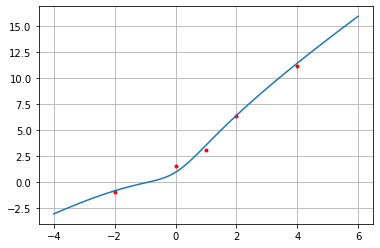

In [ ]:
import math
#Hàm logarit nepe trong Python là np.log(x), khởi tạo ma trận hệ số
A = np.array([[1, -2, math.log(5)],[1, 0, math.log(1)],[1, 1, math.log(2)],[1, 2, math.log(5)],[1, 4, math.log(17)]]) #[1, x, ln(x*x+1)]
b = np.array([-1, 1.5, 3.1, 6.3, 11.1])
#dùng công thức tính ma trận giả nghịch đảo:
b = A.transpose().dot(b)
A = A.transpose().dot(A)
hs1, hs2, hs3 = np.linalg.solve(A, b)
#code để vẽ đồ thị
from matplotlib import pyplot as plt
plt.plot(-2, -1, marker=".", color="red")
plt.plot(0, 1.5, marker=".", color="red")
plt.plot(1, 3.1, marker=".", color="red")
plt.plot(2, 6.3, marker=".", color="red")
plt.plot(4, 11.1, marker=".", color="red")
plt.plot()
x = np.linspace(-4, 6, 100)
y = [hs3+hs2*x+hs1*math.log(x*x+1) for x in x]
plt.plot(x,y)
plt.grid()
plt.show()

**Câu b.**

In [ ]:
a = 6.5
b = hs3+hs2*a+hs1*math.log(a*a+1)
b

17.0082113212665

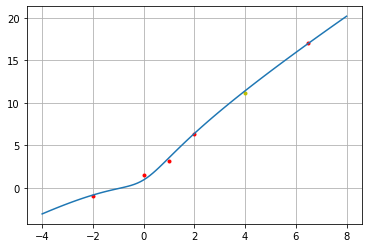

In [ ]:
plt.plot(-2, -1, marker=".", color="red")
plt.plot(0, 1.5, marker=".", color="red")
plt.plot(1, 3.1, marker=".", color="red")
plt.plot(2, 6.3, marker=".", color="red")
plt.plot(4, 11.1, marker=".", color="y")
plt.plot(a, b, marker=".", color="red")
x = np.linspace(-4, 8, 100)
y = [hs3+hs2*x+hs1*math.log(x*x+1) for x in x]
plt.plot(x,y)
plt.grid()
plt.show()

> y được dự đoán bằng $17.0082113212665$ cho đường thẳng trên

**Câu c.** không nên dùng vì tại vị trí $0$ sẽ không thỏa mãn điều kiện và bị lỗi

In [ ]:
try:
  math.log(0)
except:
  print('error')

error


### Bài 4. (2.5đ)
Theo khảo sát trong sinh viên của ĐH Công nghiệp TPHCM đối với ba quán cafe $A,B,C$ trước cổng trường thì người ta có thông tin về sự thay đổi lượng khách đến quán sau mỗi tuần như bên dưới, cho biết thêm rằng ban đầu, hai quán $A,B$ chưa mở nên $100\%$ khách đều đến $C$:
 * + Trong những SV đến quán cafe $A$, sẽ có $20\%$ người tiếp tục đến $A$, có $60\%$ người sang $B$ và $20\%$ người sang $C$.
 * + Trong những SV đến quán cafe $B$, sẽ có $10\%$ người sang $A$, có $40\%$ người tiếp tục đến $B$ và $50\%$ người sang $C$.
 * + Trong những SV đến quán cafe $C$, sẽ có $70\%$ người sang $A$, có $20\%$ người sang $B$ và $10\%$ người tiếp tục đến $C$.

- **a)** Hãy lập ma trận chuyển trạng thái Markov $X$ kích thước $3 \times 3$ mô tả cho sự thay đổi của lượng người đến các quán. Từ đó tính tỷ lệ phần trăm những người đến quán $A,B,C$ sau $1$ tháng ($4$ tuần).
- **b)** Bằng cách khảo sát các lũy thừa ma trận với số mũ lớn, hãy cho biết thị phần ổn định của các quán sau khi hoạt động trong thời gian đủ lâu. Hãy thực hiện việc này bằng $2$ cách sau: dùng vòng lặp for, dùng thư viện của numpy.linalg.

In [ ]:
#Gợi ý code mẫu như sau
X = np.array([[0.2,0.6,0.2],[0.1,0.4,0.5],[0.7,0.2,0.1]]).T # ma trận chuyển trạng thái
v = np.array([0, 0, 1]) # vector mô tả tỷ lệ khách ban đầu của A, B, C
#a) sau khi hoạt động một tháng
temp = X.copy()
for _ in range(3):
  temp = temp@X
temp@v

array([0.3259, 0.3884, 0.2857])

In [ ]:
#b) Chọn lũy thừa thích hợp đến khi ma trận hội tụ thì nêu đáp số
#Cách 1: dùng thư viện
li.matrix_power(X, 1000)@v

array([0.30555556, 0.40277778, 0.29166667])

In [ ]:
#Cách 2: dùng vòng lặp:
X2 = X.copy()
for _ in range(1000):
  X2 = np.dot(X2, X)
np.dot(X2, v)

array([0.30555556, 0.40277778, 0.29166667])

### Bài 5. (1đ)
- **a)** Hãy tải về một ảnh bất kỳ, đặt tên là *picture.jpg*, hiển thị lên notebook và cho biết tỷ lệ giữa chiều dài, rộng của nó.
- **b)** Hãy chỉnh sửa ra một ảnh mới với tên *new_pic.jpg* từ ảnh ở trên với kích thước mới có tỷ lệ chiều dài, rộng bằng tỷ lệ của giấy in, tức là $1 : \sqrt{2}$. Hãy cho biết cơ sở nào của đại số tuyến tính được sử dụng trong các thao tác xử lý ảnh này?

***Câu a***

Origin:
chiều dài: 194, chiều rộng: 156


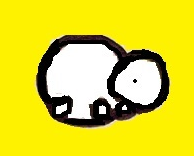

In [ ]:
#Gợi ý code mẫu như sau
from math import sqrt
from IPython.display import display
from PIL import Image
img = Image.open(r'/content/picture.png') #có thể đổi tên đường dẫn thích hợp
img.show()
#a) Hiển thị ảnh và kích thước dài - rộng
width, height = img.size
print('Origin:\nchiều dài: %d, chiều rộng: %d'%(width, height))
img

***Câu b)***

After resize:
chiều dài: 194, chiều rộng: 274


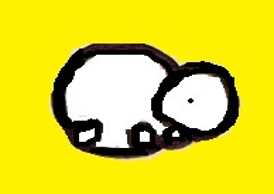

In [ ]:
#b) Điều chỉnh kích thước và hiển thị lại ảnh mới
new_width = width
new_height = int(width*sqrt(2))
x = (new_height, new_width)
new_img = img.resize(x)
print('After resize:\nchiều dài: %d, chiều rộng: %d'%(new_width, new_height))
#new_img.save(r'/content/new_pic.jpg') #có thể đổi tên đường dẫn thích hợp
new_img

### ***Bài tập bổ sung***

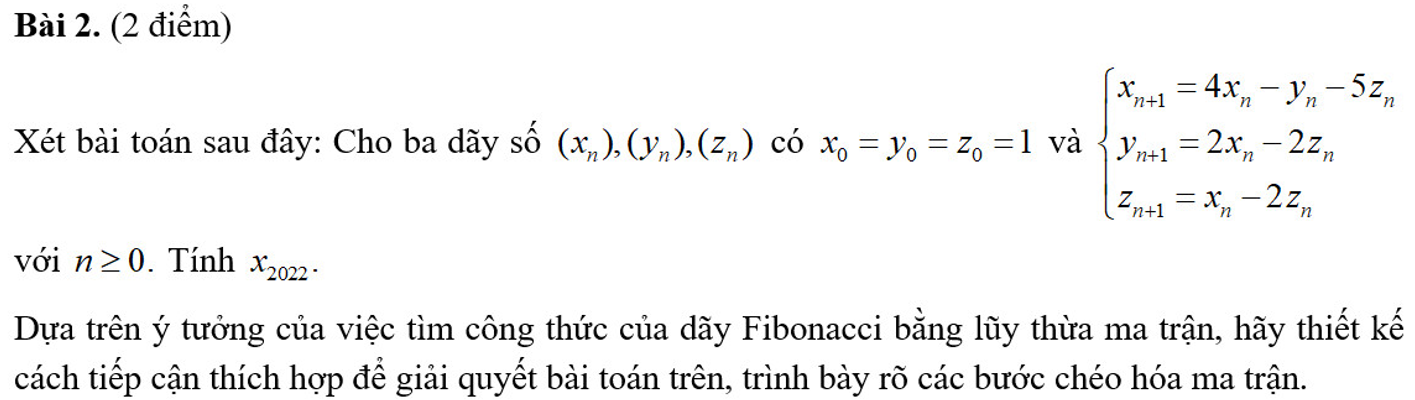

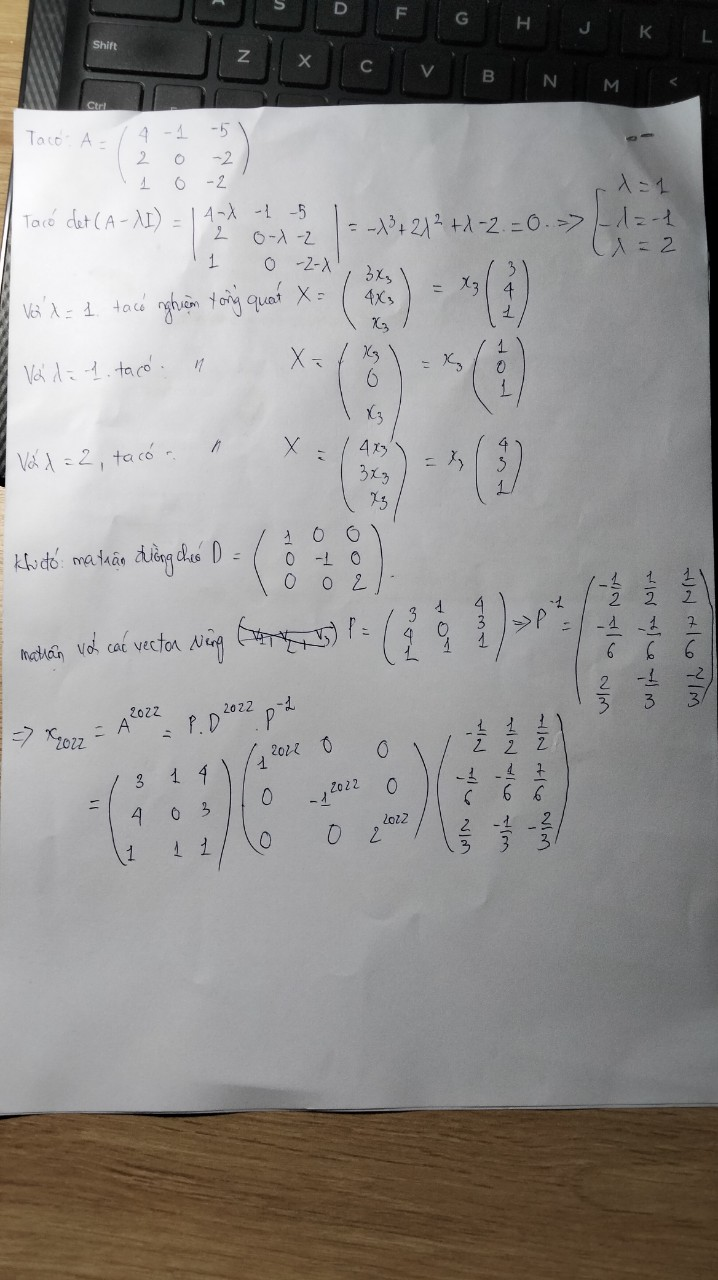